In [ ]:

!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda

In [ ]:
from datasets import load_dataset
import pandas as pd

In [ ]:
ds1 = load_dataset("shmuhammad/AfriSenti-twitter-sentiment", "ary")
type(ds1)

datasets.dataset_dict.DatasetDict

In [ ]:
ds1.align_labels_with_mapping

<bound method DatasetDict.align_labels_with_mapping of DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 5583
    })
    validation: Dataset({
        features: ['tweet', 'label'],
        num_rows: 494
    })
    test: Dataset({
        features: ['tweet', 'label'],
        num_rows: 2961
    })
})>

In [ ]:
ds1.keys()

dict_keys(['train', 'validation', 'test'])

In [ ]:
dataframes = {split: pd.DataFrame(ds1[split]) for split in ds1.keys()}

# Access individual DataFrames
train_df = dataframes['train']
validation_df = dataframes.get('validation')  # Using get() in case it doesn't exist
test_df = dataframes.get('test')

In [ ]:
train_df

,tweet,label
0,hhhhhhhhhhhhhhhhhhhhhh ana ga3ma sma3tt ach ka...,1
1,hhhh hardart jomhorha la fi3lan kadahko lach m...,1
2,: أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حا...,1
3,كان افظل حاكم عربي',0
4,ماريانو راخوي : خاص المغرب واسبانيا يشرحو للرأ...,1
...,...,...
5578,wah akhouya titiz o dikchi 3la 9ad lhal,1
5579,soukaina dik nhar drt follow haydato o 9lt f k...,1
5580,kiban liya stormy kid7ak mn hna ana,1
5581,woww ghadi tefra7 bzzf thank uu aaliaaa,0


In [ ]:
train_df['label'].value_counts()   ## 0: pos, 1: neutre, 2: neg

,count
label,
1,2161
0,1758
2,1664


In [ ]:
import re

def clean_tweet(text):
    if pd.isna(text):  # Handle NaN values
        return ""
    text = str(text)  # Ensure it's a string
    text = re.sub(r"http\S+|www\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)            # remove mentions
    text = re.sub(r"#(\w+)", r"\1", text)       # remove hashtags but keep word
    text = re.sub(r"\d+", "", text)             # remove digits
    text = re.sub(r"\s+", " ", text).strip()    # remove extra spaces
    return text

# Apply cleaning using the correct column name 'tweet'
train_df['clean_text'] = train_df['tweet'].apply(clean_tweet)
validation_df['clean_text'] = validation_df['tweet'].apply(clean_tweet)
test_df['clean_text'] = test_df['tweet'].apply(clean_tweet)

print("Cleaning completed!")
print(f"Train set: {len(train_df)} samples")
print(f"Validation set: {len(validation_df)} samples")
print(f"Test set: {len(test_df)} samples")

# Check the results
print("\nExample of original vs cleaned text:")
for i in range(3):
    print(f"Original: {train_df.iloc[i]['tweet']}")
    print(f"Cleaned:  {train_df.iloc[i]['clean_text']}")
    print(f"Label:    {train_df.iloc[i]['label']}")
    print("-" * 50)

Cleaning completed!
Train set: 5583 samples
Validation set: 494 samples
Test set: 2961 samples

Example of original vs cleaned text:
Original: hhhhhhhhhhhhhhhhhhhhhh ana ga3ma sma3tt ach kant kat9oll kanrakazz ghir m3a zineb oyassmin ochirine
Cleaned:  hhhhhhhhhhhhhhhhhhhhhh ana gama smatt ach kant katoll kanrakazz ghir ma zineb oyassmin ochirine
Label:    1
--------------------------------------------------
Original: hhhh hardart jomhorha la fi3lan kadahko lach mrakzin m3aha ama kayn bin li kaydir dakchi 3alanan ou li khbit bhal bohila
Cleaned:  hhhh hardart jomhorha la filan kadahko lach mrakzin maha ama kayn bin li kaydir dakchi alanan ou li khbit bhal bohila
Label:    1
--------------------------------------------------
Original: : أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حان وقت تنزيل شامل للجهوية المتقدمة وتحمل المتخبين الجهوين لكامل صلاحياتهم لشرح تفا…
Cleaned:  : أتفهم العثماني وأتفهم الجدل الشعبي. الحل: حان وقت تنزيل شامل للجهوية المتقدمة وتحمل المتخبين الجهوين لكامل صلاحياته

In [ ]:
label_mapping = {0: 'positive', 1: 'neutral', 2: 'negative'}
train_df['label_text'] = train_df['label'].map(label_mapping)

print("\nLabel distribution with names:")
print(train_df['label_text'].value_counts())




Label distribution with names:
label_text
neutral     2161
positive    1758
negative    1664
Name: count, dtype: int64


In [ ]:
# # Define the mapping
# label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}

# # Get class distribution and identify majority/minority classes
# class_counts = train_df['label'].value_counts().sort_index()
# target_count = class_counts.max()
# majority_class = class_counts.idxmax()

# print("Current class distribution:")
# for label, count in class_counts.items():
#     print(f"  {label_map[label]} ({label}): {count}")
# print(f"\nMajority class: {label_map[majority_class]} with {target_count} samples")

# # Identify which classes need augmentation
# classes_to_augment = []
# for label in [0, 1, 2]:
#     current_count = class_counts.get(label, 0)
#     if current_count < target_count:
#         needed = target_count - current_count
#         classes_to_augment.append((label, needed))
#         print(f"Need to augment {label_map[label]} by {needed} samples")

# if not classes_to_augment:
#     print("All classes are already balanced!")
# else:
#     print(f"\nWill augment {len(classes_to_augment)} classes")

# # Import required libraries
# import random
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from imblearn.over_sampling import SMOTE
# import numpy as np

# # Set random seed for reproducibility
# random.seed(42)
# np.random.seed(42)

# def random_insertion(text, n=1):
#     """Insert common Arabic filler words"""
#     words = text.split()
#     if len(words) < 2:
#         return text

#     # Common Arabic/Darija filler words and particles
#     fillers = ['يعني', 'بصراحة', 'والله', 'أكيد', 'طبعا', 'يا أخي', 'بزاف', 'شوية']

#     for _ in range(n):
#         if len(words) > 0:
#             new_word = random.choice(fillers)
#             random_idx = random.randint(0, len(words))
#             words.insert(random_idx, new_word)

#     return ' '.join(words)

# def random_deletion(text, p=0.1):
#     """Randomly delete words with probability p"""
#     words = text.split()
#     if len(words) <= 2:  # Keep at least 2 words
#         return text

#     new_words = []
#     for word in words:
#         if random.uniform(0, 1) > p:
#             new_words.append(word)

#     return ' '.join(new_words) if len(new_words) > 1 else text

# def shuffle_words(text, p=0.3):
#     """Slightly shuffle word order"""
#     words = text.split()
#     if len(words) < 3:
#         return text

#     if random.uniform(0, 1) < p:
#         # Swap two adjacent words
#         idx = random.randint(0, len(words)-2)
#         words[idx], words[idx+1] = words[idx+1], words[idx]

#     return ' '.join(words)

# def augment_text_simple(text):
#     """Apply simple augmentation techniques"""
#     techniques = [
#         lambda x: random_deletion(x, p=0.1),
#         lambda x: random_insertion(x, n=1),
#         lambda x: shuffle_words(x, p=0.3)
#     ]

#     # Randomly choose one technique
#     technique = random.choice(techniques)
#     return technique(text)

# # SMOTE-based augmentation function
# def smote_text_augmentation(texts, labels, target_samples_per_class):
#     """Use SMOTE on TF-IDF vectors for text augmentation"""
#     print("Applying SMOTE-based text augmentation...")

#     # Convert texts to TF-IDF vectors
#     vectorizer = TfidfVectorizer(
#         max_features=3000,
#         ngram_range=(1, 2),
#         min_df=2,
#         stop_words=None  # Keep Arabic stop words for dialect preservation
#     )

#     X_tfidf = vectorizer.fit_transform(texts)

#     # Apply SMOTE
#     smote = SMOTE(random_state=42, k_neighbors=3)
#     X_resampled, y_resampled = smote.fit_resample(X_tfidf, labels)

#     return X_resampled, y_resampled, vectorizer

# # Start augmentation process
# augmented_rows = []

# if classes_to_augment:
#     # Prepare data for SMOTE
#     minority_texts = []
#     minority_labels = []

#     for label, needed in classes_to_augment:
#         subset = train_df[train_df['label'] == label]
#         if len(subset) == 0:
#             print(f"Warning: No samples found for class {label}")
#             continue

#         print(f"\nProcessing class {label_map[label]} ({label})...")

#         # For each sample in minority class, create multiple variations
#         for _, row in subset.iterrows():
#             text = row['clean_text']
#             if not text or text.strip() == "":
#                 continue

#             # Create variations using simple augmentation
#             variations_needed = min(3, needed // len(subset) + 1)

#             for i in range(variations_needed):
#                 if i == 0:
#                     # Keep original
#                     aug_text = text
#                 else:
#                     # Apply augmentation
#                     aug_text = augment_text_simple(text)

#                 minority_texts.append(aug_text)
#                 minority_labels.append(label)

#     # Apply SMOTE if we have enough samples
#     if len(minority_texts) > 1:
#         try:
#             # Get all training texts and labels for SMOTE
#             all_texts = train_df['clean_text'].tolist()
#             all_labels = train_df['label'].tolist()

#             # Apply SMOTE
#             X_resampled, y_resampled, vectorizer = smote_text_augmentation(
#                 all_texts, all_labels, target_count
#             )

#             print("SMOTE augmentation completed successfully!")

#             # For SMOTE results, we'll use the simple augmentation approach
#             # since reconstructing text from TF-IDF is complex

#         except Exception as e:
#             print(f"SMOTE failed: {e}")
#             print("Falling back to simple augmentation...")

#     # Simple augmentation approach (primary method)
#     for label, needed in classes_to_augment:
#         print(f"\nAugmenting class {label_map[label]} ({label}) with {needed} examples...")

#         subset = train_df[train_df['label'] == label]

#         if len(subset) == 0:
#             continue

#         samples_added = 0
#         iterations = 0
#         max_iterations = needed * 3  # Prevent infinite loops

#         while samples_added < needed and iterations < max_iterations:
#             # Cycle through available samples
#             row = subset.iloc[iterations % len(subset)]
#             text = row['clean_text']

#             if not text or text.strip() == "":
#                 iterations += 1
#                 continue

#             # Apply augmentation
#             aug_text = augment_text_simple(text)

#             # Only add if it's different from original
#             if aug_text != text:
#                 augmented_rows.append({
#                     'tweet': aug_text,
#                     'clean_text': aug_text,
#                     'label': row['label'],
#                     'label_text': label_map[label]
#                 })
#                 samples_added += 1

#             iterations += 1

#             # Progress indicator
#             if samples_added % 20 == 0 and samples_added > 0:
#                 print(f"  Progress: {samples_added}/{needed} samples augmented for {label_map[label]}")

# # Create final balanced dataset
# if augmented_rows:
#     aug_df = pd.DataFrame(augmented_rows)
#     balanced_train_df = pd.concat([train_df, aug_df], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)

#     # Verify the structure
#     print("\nDataFrame structure verification:")
#     print("Original DataFrame columns:", train_df.columns.tolist())
#     print("Augmented DataFrame columns:", aug_df.columns.tolist())
#     print("Combined DataFrame columns:", balanced_train_df.columns.tolist())

#     # Check final class distribution
#     print("\nFinal class distribution after augmentation:")
#     final_counts = balanced_train_df['label'].value_counts().sort_index()
#     for label, count in final_counts.items():
#         print(f"  {label_map[label]} ({label}): {count}")

#     # Update train_df
#     train_df = balanced_train_df

#     print(f"\nTotal samples: {len(train_df)}")
#     print(f"Augmented samples added: {len(aug_df)}")

# else:
#     print("No augmentation needed - classes are already balanced!")

# print("\nAugmentation completed!")

# # Optional: Save the balanced dataset
# # train_df.to_csv('balanced_train_data.csv', index=False)
# # print("Balanced dataset saved to 'balanced_train_data.csv'")

Current class distribution:
  positive (0): 1758
  neutral (1): 2161
  negative (2): 1664

Majority class: neutral with 2161 samples
Need to augment positive by 403 samples
Need to augment negative by 497 samples

Will augment 2 classes

Processing class positive (0)...

Processing class negative (2)...
Applying SMOTE-based text augmentation...
SMOTE augmentation completed successfully!

Augmenting class positive (0) with 403 examples...
  Progress: 20/403 samples augmented for positive
  Progress: 40/403 samples augmented for positive
  Progress: 60/403 samples augmented for positive
  Progress: 60/403 samples augmented for positive
  Progress: 60/403 samples augmented for positive
  Progress: 60/403 samples augmented for positive
  Progress: 60/403 samples augmented for positive
  Progress: 80/403 samples augmented for positive
  Progress: 100/403 samples augmented for positive
  Progress: 120/403 samples augmented for positive
  Progress: 140/403 samples augmented for positive
  Pro

In [ ]:
train_df = pd.read_csv("final_tr.csv")

In [ ]:
train_df['label'].value_counts()

,count
label,
1,2161
0,1758
2,1664


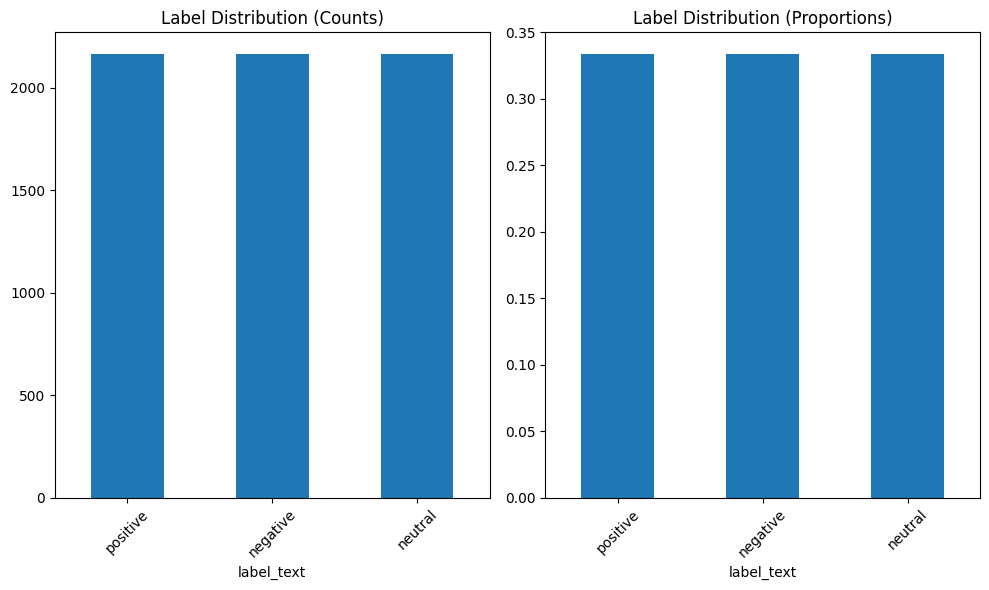


Validation set distribution:
label
0    167
1    189
2    138
Name: count, dtype: int64

Test set distribution:
label
0    1144
1     967
2     850
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the imbalance
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
train_df['label_text'].value_counts().plot(kind='bar')
plt.title('Label Distribution (Counts)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
train_df['label_text'].value_counts(normalize=True).plot(kind='bar')
plt.title('Label Distribution (Proportions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check validation and test distributions too
if validation_df is not None:
    print("\nValidation set distribution:")
    print(validation_df['label'].value_counts().sort_index())

if test_df is not None:
    print("\nTest set distribution:")
    print(test_df['label'].value_counts().sort_index())

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights for imbalanced learning
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)

class_weight_dict = dict(zip(np.unique(train_df['label']), class_weights))
print("Class weights for balanced training:")
print(class_weight_dict)


Class weights for balanced training:
{np.int64(0): np.float64(1.058589306029579), np.int64(1): np.float64(0.8611753817677001), np.int64(2): np.float64(1.1183894230769231)}


In [ ]:
# Text length analysis
train_df['text_length'] = train_df['clean_text'].str.len()
train_df['word_count'] = train_df['clean_text'].str.split().str.len()

print("Text statistics:")
print(train_df[['text_length', 'word_count']].describe())

# Remove very short texts (less than 3 characters)
print(f"Removing {len(train_df[train_df['text_length'] < 3])} very short texts")
train_df = train_df[train_df['text_length'] >= 3].reset_index(drop=True)

# Check for empty texts after cleaning
empty_texts = train_df[train_df['clean_text'].str.strip() == '']
print(f"Found {len(empty_texts)} empty texts after cleaning")

if len(empty_texts) > 0:
    print("Removing empty texts...")
    train_df = train_df[train_df['clean_text'].str.strip() != ''].reset_index(drop=True)

print(f"Final training set size: {len(train_df)}")
print("Final label distribution:")
print(train_df['label'].value_counts().sort_index())

Text statistics:
       text_length   word_count
count  5583.000000  5583.000000
mean     74.162995    13.005732
std      42.195884     7.280304
min       4.000000     1.000000
25%      42.000000     8.000000
50%      70.000000    12.000000
75%     100.000000    17.000000
max     771.000000   119.000000
Removing 0 very short texts
Found 0 empty texts after cleaning
Final training set size: 5583
Final label distribution:
label
0    1758
1    2161
2    1664
Name: count, dtype: int64


In [ ]:
try:
    X_train = train_df['clean_text'].values
    y_train = train_df['label'].values
    print(f"✓ Training data loaded: {len(X_train)} samples")

    # Handle validation data
    if 'validation_df' in globals() and validation_df is not None:
        X_val = validation_df['clean_text'].values
        y_val = validation_df['label'].values
        print(f"✓ Validation data loaded: {len(X_val)} samples")
    else:
        # Split training data if no validation set
        print("⚠ No validation set found. Splitting training data...")
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        print(f"✓ Data split - Training: {len(X_train)}, Validation: {len(X_val)}")

    # Handle test data
    if 'test_df' in globals() and test_df is not None:
        X_test = test_df['clean_text'].values
        y_test = test_df['label'].values
        print(f"✓ Test data loaded: {len(X_test)} samples")
    else:
        print("⚠ No test set provided")
        X_test, y_test = None, None

except NameError:
    print("❌ Error: Data not found. Please ensure you have:")
    print("- train_df with 'clean_text' and 'label' columns")
    print("- validation_df (optional)")
    print("- test_df (optional)")
    raise

# Analyze label distribution
unique_labels = np.unique(y_train)
num_labels = len(unique_labels)
print(f"\n📊 Dataset Analysis:")
print(f"Number of unique labels: {num_labels}")
print(f"Labels: {unique_labels}")

# Create label mapping for interpretability
if num_labels == 2:
    label_names = {0: 'Positive', 1: 'Negative'}
elif num_labels == 3:
    label_names = {0: 'Positive', 1: 'Neutral', 2: 'Negative'}
else:
    label_names = {i: f'Label_{i}' for i in range(num_labels)}

print("Label distribution in training set:")
train_label_counts = pd.Series(y_train).value_counts().sort_index()
for label, count in train_label_counts.items():
    percentage = (count / len(y_train)) * 100
    print(f"  {label_names[label]} ({label}): {count} ({percentage:.1f}%)")


✓ Training data loaded: 5583 samples
✓ Validation data loaded: 494 samples
✓ Test data loaded: 2961 samples

📊 Dataset Analysis:
Number of unique labels: 3
Labels: [0 1 2]
Label distribution in training set:
  Positive (0): 1758 (31.5%)
  Neutral (1): 2161 (38.7%)
  Negative (2): 1664 (29.8%)


In [ ]:
# # Simple direct save of the final train_df
# from datetime import datetime

# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# # Save the final augmented train_df
# train_df.to_csv(f'final_train_df_{timestamp}.csv', index=False, encoding='utf-8')

# print(f"Final train_df saved as: final_train_df_{timestamp}.csv")
# print(f"Shape: {train_df.shape}")
# print(f"Columns: {train_df.columns.tolist()}")

# # Quick verification
# print("\nClass distribution:")
# print(train_df['label'].value_counts().sort_index())

# print(f"\nFile ready for download: final_train_df_{timestamp}.csv")

# # To load it back later, simply use:
# print("\nTo load later:")
# print(f"train_df = pd.read_csv('final_train_df_{timestamp}.csv')")

Final train_df saved as: final_train_df_20250608_114115.csv
Shape: (6483, 6)
Columns: ['tweet', 'label', 'clean_text', 'label_text', 'text_length', 'word_count']

Class distribution:
label
0    2161
1    2161
2    2161
Name: count, dtype: int64

File ready for download: final_train_df_20250608_114115.csv

To load later:
train_df = pd.read_csv('final_train_df_20250608_114115.csv')


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler, WeightedRandomSampler
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import os
import time
import torch.nn as nn
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import WeightedRandomSampler


In [ ]:
# Set seed for reproducibility
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
class_weight_tensor = torch.tensor([class_weight_dict[i] for i in range(len(class_weight_dict))],
                                  dtype=torch.float).to(device)

print("Class weights computed:")
for label, weight in class_weight_dict.items():
    print(f"  Class {label}: {weight:.3f}")

Class weights computed:
  Class 0: 1.059
  Class 1: 0.861
  Class 2: 1.118


In [ ]:
# Arabic BERT model options (reordered by effectiveness for dialects):
model_options = {
    1: "CAMeL-Lab/bert-base-arabic-camelbert-mix",  # BEST for dialects - MSA + dialectal mix
    2: "UBC-NLP/MARBERTv2",                         # GOOD for dialectal Arabic
    3: "aubmindlab/bert-base-arabertv2"             # STRONG for Arabic including dialects
}

print("Available Arabic BERT models (ordered by dialect performance):")
for key, model in model_options.items():
    print(f"  {key}. {model}")

# Use CAMeLBERT-Mix for best dialect performance
model_name = model_options[1]
print(f"\n🤖 Loading model: {model_name}")

try:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=num_labels,
        output_attentions=False,
        output_hidden_states=False,
        hidden_dropout_prob=0.3,  # Increased dropout for better generalization
        attention_probs_dropout_prob=0.3
    )
    print("✓ Model and tokenizer loaded successfully")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

Available Arabic BERT models (ordered by dialect performance):
  1. CAMeL-Lab/bert-base-arabic-camelbert-mix
  2. UBC-NLP/MARBERTv2
  3. aubmindlab/bert-base-arabertv2

🤖 Loading model: CAMeL-Lab/bert-base-arabic-camelbert-mix


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-mix and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model and tokenizer loaded successfully


In [ ]:
class DarijaDataset(Dataset):
    """Enhanced Dataset class for Darija sentiment analysis"""

    def __init__(self, texts, labels, tokenizer, max_len=256):  # Increased max_len
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx]).strip()
        label = self.labels[idx]

        # Enhanced tokenization for Arabic
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
            return_token_type_ids=False  # Not needed for classification
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets with improved max_length
print("Creating datasets...")
train_dataset = DarijaDataset(X_train, y_train, tokenizer, max_len=256)
val_dataset = DarijaDataset(X_val, y_val, tokenizer, max_len=256)

if X_test is not None:
    test_dataset = DarijaDataset(X_test, y_test, tokenizer, max_len=256)
    print(f"✓ Test dataset created: {len(test_dataset)} samples")

print(f"✓ Training dataset created: {len(train_dataset)} samples")
print(f"✓ Validation dataset created: {len(val_dataset)} samples")


Creating datasets...
✓ Test dataset created: 2961 samples
✓ Training dataset created: 5583 samples
✓ Validation dataset created: 494 samples


In [ ]:
batch_size = 8  # Smaller batch size for better gradient estimates
gradient_accumulation_steps = 2  # Effective batch size = 8 * 2 = 16
print(f"Actual batch size: {batch_size}")
print(f"Effective batch size: {batch_size * gradient_accumulation_steps}")

# Create data loaders
train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=batch_size,
    num_workers=2,  # Speed up data loading
    pin_memory=True  # Faster GPU transfer
)

val_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=batch_size,
    num_workers=2,
    pin_memory=True
)

if X_test is not None:
    test_dataloader = DataLoader(
        test_dataset,
        sampler=SequentialSampler(test_dataset),
        batch_size=batch_size,
        num_workers=2,
        pin_memory=True
    )

print(f"✓ Training batches: {len(train_dataloader)}")
print(f"✓ Validation batches: {len(val_dataloader)}")

Actual batch size: 8
Effective batch size: 16
✓ Training batches: 698
✓ Validation batches: 62


In [ ]:
# Training parameters
epochs = 10  # Increased for better convergence
learning_rate = 2e-5  # Lower learning rate for stability
weight_decay = 0.01  # L2 regularization
warmup_ratio = 0.1  # 10% warmup steps
eps = 1e-8

print(f"Training epochs: {epochs}")
print(f"Learning rate: {learning_rate}")
print(f"Weight decay: {weight_decay}")

# Enhanced optimizer
optimizer = AdamW(
    model.parameters(),
    lr=learning_rate,
    eps=eps,
    weight_decay=weight_decay,
    betas=(0.9, 0.999)
)

total_steps = len(train_dataloader) * epochs // gradient_accumulation_steps
warmup_steps = int(total_steps * warmup_ratio)

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps
)

print(f"Total training steps: {total_steps}")
print(f"Warmup steps: {warmup_steps}")


Training epochs: 10
Learning rate: 2e-05
Weight decay: 0.01
Total training steps: 3490
Warmup steps: 349


In [ ]:
# Use weighted CrossEntropyLoss
criterion = torch.nn.CrossEntropyLoss(weight=class_weight_tensor)

def train_epoch(model, dataloader, optimizer, scheduler, device, criterion, gradient_accumulation_steps):
    """Enhanced training function with gradient accumulation and class weights"""
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    progress_bar = tqdm(dataloader, desc="Training", leave=False)

    for step, batch in enumerate(progress_bar):
        # Move to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        logits = outputs.logits
        loss = criterion(logits, labels)  # Use weighted loss

        # Scale loss by gradient accumulation steps
        loss = loss / gradient_accumulation_steps

        # Backward pass
        loss.backward()

        # Gradient accumulation
        if (step + 1) % gradient_accumulation_steps == 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()

        # Track metrics
        total_loss += loss.item() * gradient_accumulation_steps
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels_cpu = labels.cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(labels_cpu)

        progress_bar.set_postfix({"loss": f"{loss.item() * gradient_accumulation_steps:.4f}"})

    # Calculate epoch metrics
    epoch_loss = total_loss / len(dataloader)
    epoch_accuracy = accuracy_score(all_labels, all_preds)
    epoch_f1 = f1_score(all_labels, all_preds, average='weighted')

    return epoch_loss, epoch_accuracy, epoch_f1

def evaluate(model, dataloader, device, criterion):
    """Enhanced evaluation function"""
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        progress_bar = tqdm(dataloader, desc="Evaluating", leave=False)
        for batch in progress_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            logits = outputs.logits
            loss = criterion(logits, labels)

            # Get probabilities for confidence analysis
            probs = torch.softmax(logits, dim=1)

            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            labels_cpu = labels.cpu().numpy()
            probs_cpu = probs.cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels_cpu)
            all_probs.extend(probs_cpu)

            progress_bar.set_postfix({"loss": f"{loss.item():.4f}"})

    epoch_loss = total_loss / len(dataloader)
    epoch_accuracy = accuracy_score(all_labels, all_preds)
    epoch_f1 = f1_score(all_labels, all_preds, average='weighted')

    return epoch_loss, epoch_accuracy, epoch_f1, all_preds, all_labels, all_probs


In [ ]:
# Move model to device
model.to(device)

# Training tracking
train_losses = []
train_accuracies = []
train_f1_scores = []
val_losses = []
val_accuracies = []
val_f1_scores = []

best_val_f1 = 0
best_model_state = None
patience = 3  # Early stopping patience
patience_counter = 0

start_time = time.time()

print("🚀 Training started with enhanced configuration...")

for epoch in range(epochs):
    print(f"\n📅 Epoch {epoch+1}/{epochs}")

    # Train
    train_loss, train_accuracy, train_f1 = train_epoch(
        model, train_dataloader, optimizer, scheduler, device, criterion, gradient_accumulation_steps
    )

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)

    print(f"📈 Train - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, F1: {train_f1:.4f}")

    # Evaluate
    val_loss, val_accuracy, val_f1, val_preds, val_labels, val_probs = evaluate(
        model, val_dataloader, device, criterion
    )

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    val_f1_scores.append(val_f1)

    print(f"📊 Val   - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, F1: {val_f1:.4f}")

    # Early stopping and model saving
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_model_state = model.state_dict().copy()
        patience_counter = 0
        print(f"💾 New best model saved! F1: {best_val_f1:.4f}")
    else:
        patience_counter += 1
        print(f"⏳ No improvement. Patience: {patience_counter}/{patience}")

        if patience_counter >= patience:
            print("🛑 Early stopping triggered!")
            break

end_time = time.time()
training_time = end_time - start_time

print(f"\n✅ Training completed in {training_time:.1f} seconds ({training_time/60:.1f} minutes)")
print(f"🏆 Best validation F1: {best_val_f1:.4f}")

# Load best model
model.load_state_dict(best_model_state)


🚀 Training started with enhanced configuration...

📅 Epoch 1/10


📈 Train - Loss: 0.8929, Accuracy: 0.5766, F1: 0.5685


📊 Val   - Loss: 0.6447, Accuracy: 0.7368, F1: 0.7367
💾 New best model saved! F1: 0.7367

📅 Epoch 2/10


📈 Train - Loss: 0.6284, Accuracy: 0.7147, F1: 0.7122


📊 Val   - Loss: 0.5975, Accuracy: 0.7348, F1: 0.7224
⏳ No improvement. Patience: 1/3

📅 Epoch 3/10


📈 Train - Loss: 0.5525, Accuracy: 0.7580, F1: 0.7565


📊 Val   - Loss: 0.5854, Accuracy: 0.7429, F1: 0.7455
💾 New best model saved! F1: 0.7455

📅 Epoch 4/10


📈 Train - Loss: 0.5066, Accuracy: 0.7732, F1: 0.7719


📊 Val   - Loss: 0.5990, Accuracy: 0.7652, F1: 0.7662
💾 New best model saved! F1: 0.7662

📅 Epoch 5/10


📈 Train - Loss: 0.4754, Accuracy: 0.7953, F1: 0.7944


📊 Val   - Loss: 0.6624, Accuracy: 0.7267, F1: 0.7263
⏳ No improvement. Patience: 1/3

📅 Epoch 6/10


📈 Train - Loss: 0.4395, Accuracy: 0.8066, F1: 0.8059


📊 Val   - Loss: 0.6090, Accuracy: 0.7773, F1: 0.7759
💾 New best model saved! F1: 0.7759

📅 Epoch 7/10


📈 Train - Loss: 0.4091, Accuracy: 0.8239, F1: 0.8236


📊 Val   - Loss: 0.6416, Accuracy: 0.7915, F1: 0.7901
💾 New best model saved! F1: 0.7901

📅 Epoch 8/10


📈 Train - Loss: 0.4005, Accuracy: 0.8214, F1: 0.8211


📊 Val   - Loss: 0.6856, Accuracy: 0.7794, F1: 0.7789
⏳ No improvement. Patience: 1/3

📅 Epoch 9/10


📈 Train - Loss: 0.3898, Accuracy: 0.8275, F1: 0.8274


📊 Val   - Loss: 0.6851, Accuracy: 0.7571, F1: 0.7572
⏳ No improvement. Patience: 2/3

📅 Epoch 10/10


📈 Train - Loss: 0.3684, Accuracy: 0.8340, F1: 0.8341


📊 Val   - Loss: 0.6829, Accuracy: 0.7713, F1: 0.7713
⏳ No improvement. Patience: 3/3
🛑 Early stopping triggered!

✅ Training completed in 2479.2 seconds (41.3 minutes)
🏆 Best validation F1: 0.7901


<All keys matched successfully>

In [ ]:
# Final validation evaluation
val_loss, val_accuracy, val_f1, val_preds, val_labels, val_probs = evaluate(
    model, val_dataloader, device, criterion
)

print("📋 FINAL VALIDATION RESULTS:")
print(f"Loss: {val_loss:.4f}")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")

# Confidence analysis
confidence_scores = np.max(val_probs, axis=1)
avg_confidence = np.mean(confidence_scores)
print(f"Average prediction confidence: {avg_confidence:.4f}")

print("\n📊 DETAILED CLASSIFICATION REPORT:")
print(classification_report(val_labels, val_preds, target_names=[label_names[i] for i in sorted(label_names.keys())]))

# Test evaluation if available
if X_test is not None:
    test_loss, test_accuracy, test_f1, test_preds, test_labels, test_probs = evaluate(
        model, test_dataloader, device, criterion
    )

    print("\n🧪 TEST SET RESULTS:")
    print(f"Loss: {test_loss:.4f}")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"F1 Score: {test_f1:.4f}")

    # Test confidence analysis
    test_confidence = np.max(test_probs, axis=1)
    avg_test_confidence = np.mean(test_confidence)
    print(f"Average test prediction confidence: {avg_test_confidence:.4f}")

    print("\n📊 TEST SET CLASSIFICATION REPORT:")
    print(classification_report(test_labels, test_preds, target_names=[label_names[i] for i in sorted(label_names.keys())]))


📋 FINAL VALIDATION RESULTS:
Loss: 0.6829
Accuracy: 0.7713
F1 Score: 0.7713
Average prediction confidence: 0.8427

📊 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Positive       0.81      0.72      0.76       167
     Neutral       0.78      0.80      0.79       189
    Negative       0.72      0.78      0.75       138

    accuracy                           0.77       494
   macro avg       0.77      0.77      0.77       494
weighted avg       0.77      0.77      0.77       494




🧪 TEST SET RESULTS:
Loss: 1.5271
Accuracy: 0.5356
F1 Score: 0.5377
Average test prediction confidence: 0.7835

📊 TEST SET CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Positive       0.64      0.57      0.60      1144
     Neutral       0.51      0.55      0.53       967
    Negative       0.45      0.47      0.46       850

    accuracy                           0.54      2961
   macro avg       0.53      0.53      0.53      2961
weighted avg       0.54      0.54      0.54      2961



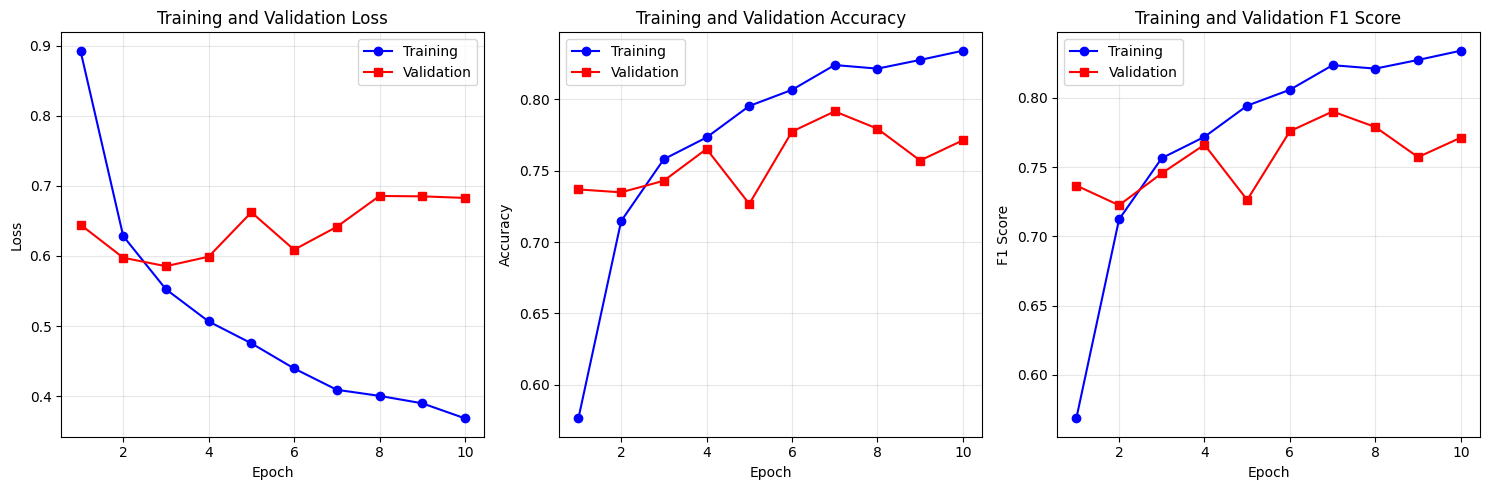

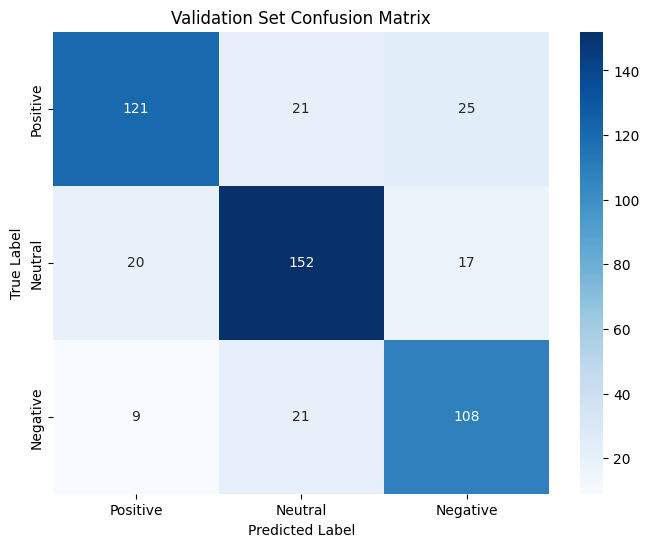

In [ ]:
# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label='Training', marker='o')
plt.plot(range(1, epochs+1), val_losses, 'r-', label='Validation', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(range(1, epochs+1), train_accuracies, 'b-', label='Training', marker='o')
plt.plot(range(1, epochs+1), val_accuracies, 'r-', label='Validation', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(range(1, epochs+1), train_f1_scores, 'b-', label='Training', marker='o')
plt.plot(range(1, epochs+1), val_f1_scores, 'r-', label='Validation', marker='s')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1 Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(val_labels, val_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[label_names[i] for i in sorted(label_names.keys())],
            yticklabels=[label_names[i] for i in sorted(label_names.keys())])
plt.title('Validation Set Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
output_dir = './darija_sentiment_model/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save model and tokenizer
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Save training results
results = {
    'best_val_f1': float(best_val_f1),
    'training_time': training_time,
    'epochs': epochs,
    'batch_size': batch_size,
    'learning_rate': learning_rate,
    'model_name': model_name,
    'num_labels': num_labels,
    'label_names': label_names
}

import json
with open(os.path.join(output_dir, 'training_results.json'), 'w', encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=2)

print(f"✅ Model saved to {output_dir}")
print("📁 Saved files:")
print("  - pytorch_model.bin (model weights)")
print("  - config.json (model configuration)")
print("  - tokenizer files")
print("  - training_results.json (training summary)")


✅ Model saved to ./darija_sentiment_model/
📁 Saved files:
  - pytorch_model.bin (model weights)
  - config.json (model configuration)
  - tokenizer files
  - training_results.json (training summary)


In [ ]:
def predict_sentiment(text, model, tokenizer, device, label_names):
    """
    Predict sentiment for a given text

    Args:
        text (str): Input text
        model: Trained model
        tokenizer: Tokenizer
        device: Computing device
        label_names (dict): Mapping of label indices to names

    Returns:
        dict: Prediction results
    """
    model.eval()

    # Tokenize
    encoding = tokenizer(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)

        pred_label = torch.argmax(logits, dim=1).cpu().item()
        confidence = probabilities[0][pred_label].cpu().item()

    return {
        'text': text,
        'predicted_label': pred_label,
        'predicted_sentiment': label_names[pred_label],
        'confidence': confidence,
        'all_probabilities': {label_names[i]: prob.item() for i, prob in enumerate(probabilities[0])}
    }

# Example predictions
example_texts = [
    "كتب حلو بزاف",  # Very nice book
    "ما عجبنيش هاد الفيلم",  # I didn't like this movie
    "واخا",  # Okay/Whatever
    "sara7a dnya ghada okat5yab",  # Excellent
]

print("🔮 EXAMPLE PREDICTIONS:")
print("-" * 50)

for text in example_texts:
    result = predict_sentiment(text, model, tokenizer, device, label_names)
    print(f"Text: {result['text']}")
    print(f"Prediction: {result['predicted_sentiment']} (confidence: {result['confidence']:.3f})")
    print(f"All probabilities: {result['all_probabilities']}")
    print("-" * 50)


🔮 EXAMPLE PREDICTIONS:
--------------------------------------------------
Text: كتب حلو بزاف
Prediction: Positive (confidence: 0.987)
All probabilities: {'Positive': 0.987038791179657, 'Neutral': 0.011175072751939297, 'Negative': 0.0017861673841252923}
--------------------------------------------------
Text: ما عجبنيش هاد الفيلم
Prediction: Neutral (confidence: 0.980)
All probabilities: {'Positive': 0.002047592541202903, 'Neutral': 0.980451762676239, 'Negative': 0.017500683665275574}
--------------------------------------------------
Text: واخا
Prediction: Neutral (confidence: 0.636)
All probabilities: {'Positive': 0.32362550497055054, 'Neutral': 0.635943591594696, 'Negative': 0.04043087735772133}
--------------------------------------------------
Text: sara7a dnya ghada okat5yab
Prediction: Positive (confidence: 0.653)
All probabilities: {'Positive': 0.6525622010231018, 'Neutral': 0.17911271750926971, 'Negative': 0.16832511126995087}
--------------------------------------------------
